This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../snudda/data/neurons")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 4222153243
Random seed place to 1767856700
Random seed detect to 1683689912
Random seed prune to 2943769336
Random seed input to 2946915125
Random seed simulate to 2290411591
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir ../../snudda/data/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(config_file=config_file)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 1767856700
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.017498629982583225 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found old cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Saving cache fil

In [3]:
from snudda.detect import SnuddaDetect
save_file = os.path.join(network_path, "voxels", "network-putative-synapses.hdf5")

sd = SnuddaDetect(config_file=config_file, position_file=position_file, save_file=save_file)
sd.detect()

Using hdf5 driver version: latest
Memory: 63372115968 free, 67218092032 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/simple_example/network-putative-synapses-MERGED.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5-cache
Loading from networks/simple_example/network-config.json
Reading random seed from config file: 1683689912
Reading prototype for: dSPN_0
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading pro

Create lookup table
detectSynapses: 1 took 0.004184599005384371 s
Create lookup table
detectGapJunctions: 0.00275525901815854 s
Wrote hyper voxel 36 (1 synapses, 0 gap junctions)
HyperID 36 completed - 1  synapses and 0 gap junctions found (in 5.853931941994233 s)
Processing hyper voxel : 41/64(34 neurons)
Create lookup table
detectSynapses: 2 took 0.004169558989815414 s
Create lookup table
detectGapJunctions: 0.0025956520112231374 s
Wrote hyper voxel 41 (2 synapses, 0 gap junctions)
HyperID 41 completed - 2  synapses and 0 gap junctions found (in 5.023666223016335 s)
Processing hyper voxel : 33/64(27 neurons)
Create lookup table
detectSynapses: 0 took 0.004381704988190904 s
Create lookup table
detectGapJunctions: 0.0024462330038659275 s
Wrote hyper voxel 33 (0 synapses, 0 gap junctions)
HyperID 33 completed - 0  synapses and 0 gap junctions found (in 4.08377592699253 s)
Processing hyper voxel : 0/64(24 neurons)
Create lookup table
detectSynapses: 2 took 0.0043707810109481215 s
Create 

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 2943769336
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening 

Random seed set for neuron 66: 2176439158
Random seed set for neuron 67: 2357088656
Random seed set for neuron 68: 1978784098
Random seed set for neuron 69: 1856203411
Random seed set for neuron 70: 676667226
Random seed set for neuron 71: 3448983565
Random seed set for neuron 72: 3564699403
Random seed set for neuron 73: 544238096
Random seed set for neuron 74: 310123507
Random seed set for neuron 75: 2417322267
Random seed set for neuron 76: 3134883977
Random seed set for neuron 77: 2092332774
Random seed set for neuron 78: 2663645963
Random seed set for neuron 79: 1002064132
Random seed set for neuron 80: 565421184
Random seed set for neuron 81: 3138807190
Random seed set for neuron 82: 3210682512
Random seed set for neuron 83: 1883801062
Random seed set for neuron 84: 4132139608
Random seed set for neuron 85: 950502999
Random seed set for neuron 86: 3531114103
Random seed set for neuron 87: 1451170593
Random seed set for neuron 88: 1325473266
Random seed set for neuron 89: 52302798

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24807 synapses and 0 gap junctions
Load done. 0.024151791003532708
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found

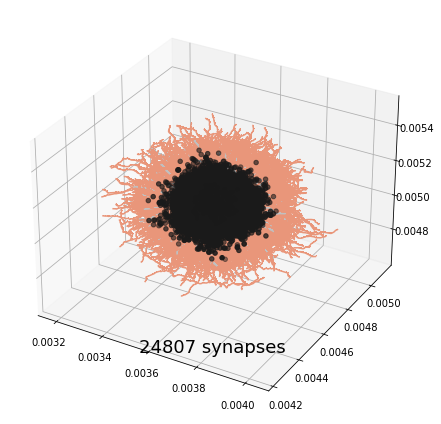

In [5]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it